<a href="https://colab.research.google.com/github/DineshReacts/ML-LEARN/blob/main/skwness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv("/content/Project 1 - Weather Dataset.csv")

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [11]:
def simplify_weather(weather):
    if 'Clear' in weather:
        return 'Clear/Mainly Clear'
    elif 'Cloudy' in weather:
        return 'Cloudy/Mostly Cloudy'
    elif 'Rain' in weather or 'Drizzle' in weather:
        return 'Rain'
    elif 'Snow' in weather:
        return 'Snow'
    else:
        return 'Other'

data['Weather_Simplified'] = data['Weather'].apply(simplify_weather)

In [12]:
data["Weather_Simplified"].value_counts()

,count
Weather_Simplified,
Cloudy/Mostly Cloudy,3797
Clear/Mainly Clear,3432
Rain,855
Snow,528
Other,172


In [13]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather',
       'Weather_Simplified'],
      dtype='object')

In [14]:
ind=data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [15]:
dep=data[["Weather_Simplified"]]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [17]:
from sklearn import tree

In [18]:
clf = tree.DecisionTreeClassifier()

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred=clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [24]:
cls=classification_report(y_test, y_pred)

In [25]:
print(cls)

                      precision    recall  f1-score   support

  Clear/Mainly Clear       0.65      0.65      0.65       665
Cloudy/Mostly Cloudy       0.64      0.65      0.64       772
               Other       0.62      0.68      0.65        37
                Rain       0.57      0.51      0.54       166
                Snow       0.72      0.68      0.70       117

            accuracy                           0.64      1757
           macro avg       0.64      0.63      0.64      1757
        weighted avg       0.64      0.64      0.64      1757



In [26]:
import numpy as np

# Calculate Skewness and Kurtosis for numerical columns
skewness = data.select_dtypes(include=np.number).skew()
kurtosis = data.select_dtypes(include=np.number).kurtosis()

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

# Calculate IQR for numerical columns
Q1 = data.select_dtypes(include=np.number).quantile(0.25)
Q3 = data.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

print("\nIQR:")
print(IQR)

Skewness:
Temp_C             -0.177666
Dew Point Temp_C   -0.318433
Rel Hum_%          -0.323830
Wind Speed_km/h     0.871374
Visibility_km       0.413362
Press_kPa          -0.229925
dtype: float64

Kurtosis:
Temp_C             -0.915557
Dew Point Temp_C   -0.815788
Rel Hum_%          -0.552935
Wind Speed_km/h     1.540713
Visibility_km      -0.351031
Press_kPa           0.714451
dtype: float64

IQR:
Temp_C              18.70
Dew Point Temp_C    17.70
Rel Hum_%           25.00
Wind Speed_km/h     11.00
Visibility_km        0.90
Press_kPa            1.03
dtype: float64


# Task
Analyze the provided dataset, calculate skewness, kurtosis, and IQR, and visualize the data.

## Identify visualization goals

### Subtask:
Determine what aspects of the data the user wants to visualize (e.g., distributions of variables, relationships between variables, trends over time).


## Choose visualization types

### Subtask:
Select appropriate plot types based on the data types and visualization goals (e.g., histograms for distributions, scatter plots for relationships, line plots for time series).


**Reasoning**:
Identify the numerical columns in the `data` DataFrame to prepare for visualization of distributions and potential outliers.



In [27]:
numerical_cols = data.select_dtypes(include=np.number).columns
print("Numerical columns in the dataset:")
print(numerical_cols)

Numerical columns in the dataset:
Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')


## Generate visualization code

### Subtask:
Generate visualization code to create histograms for the distribution of numerical columns and box plots for visualizing potential outliers.


**Reasoning**:
Generate visualization code to create histograms and box plots for the numerical columns to visualize their distributions and potential outliers.



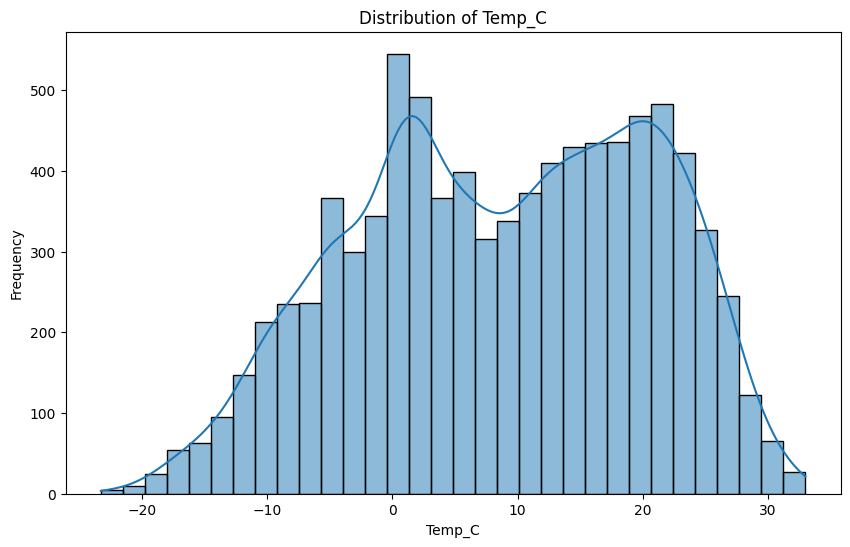

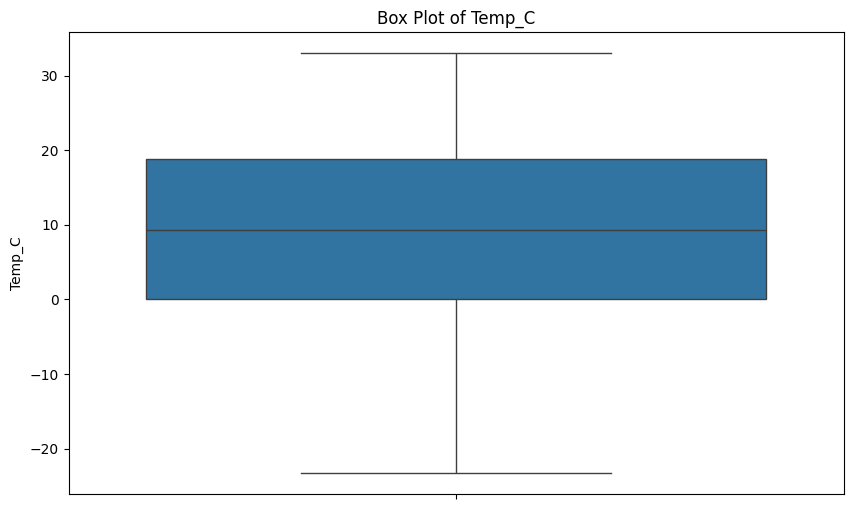

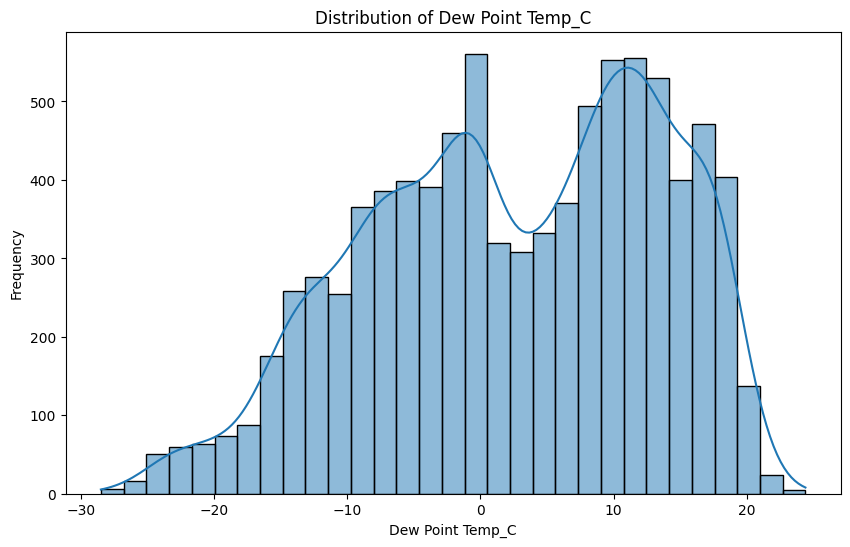

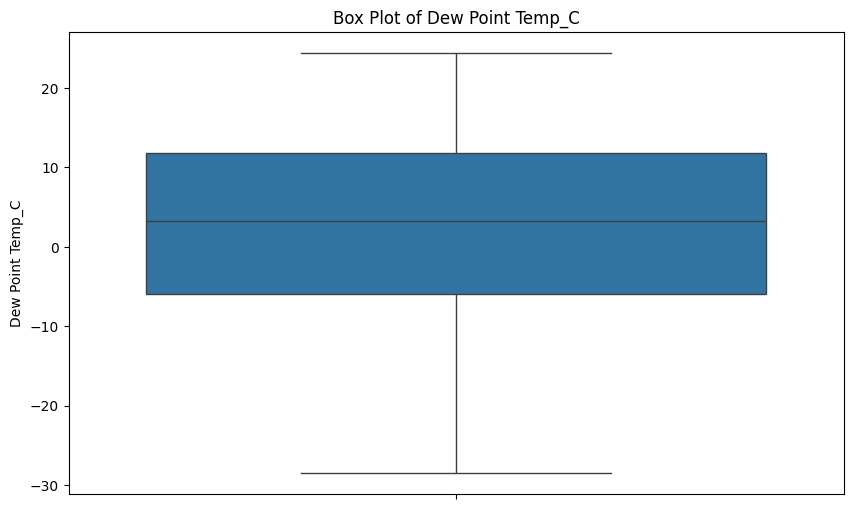

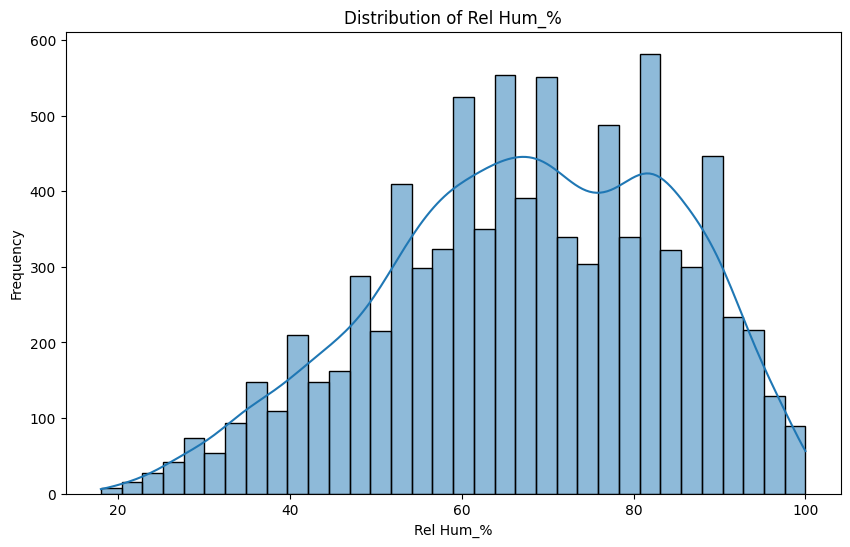

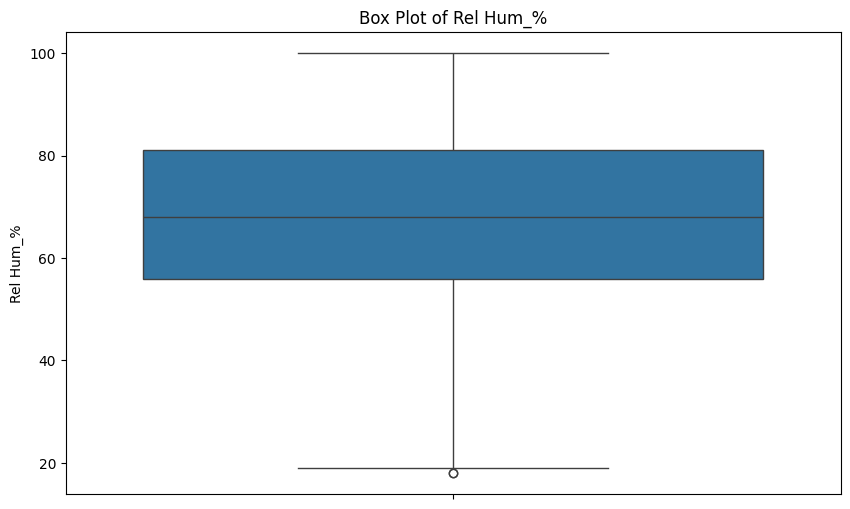

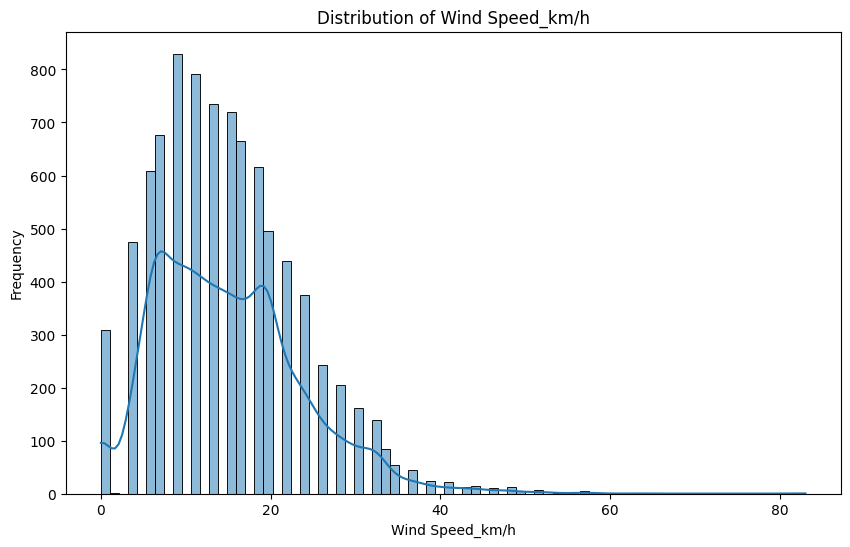

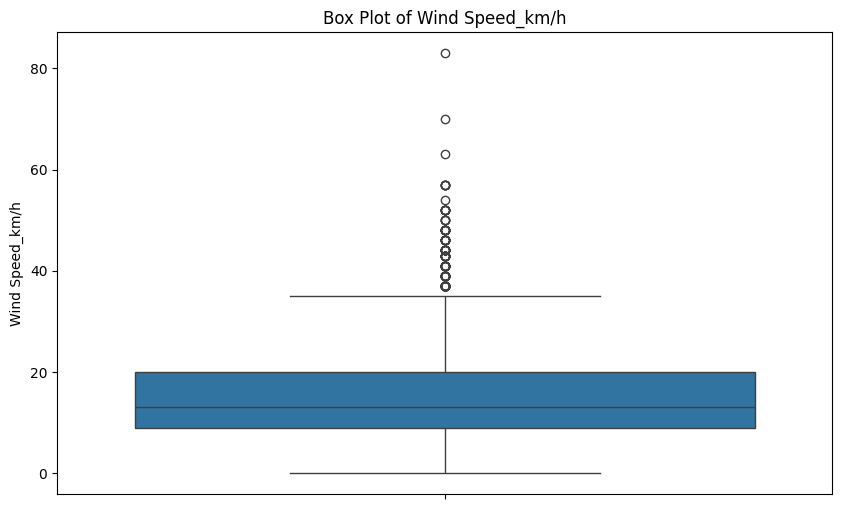

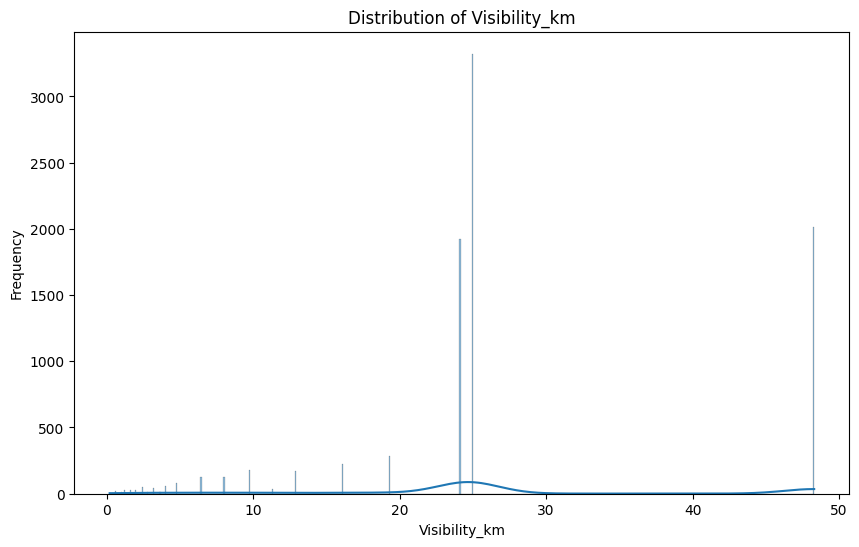

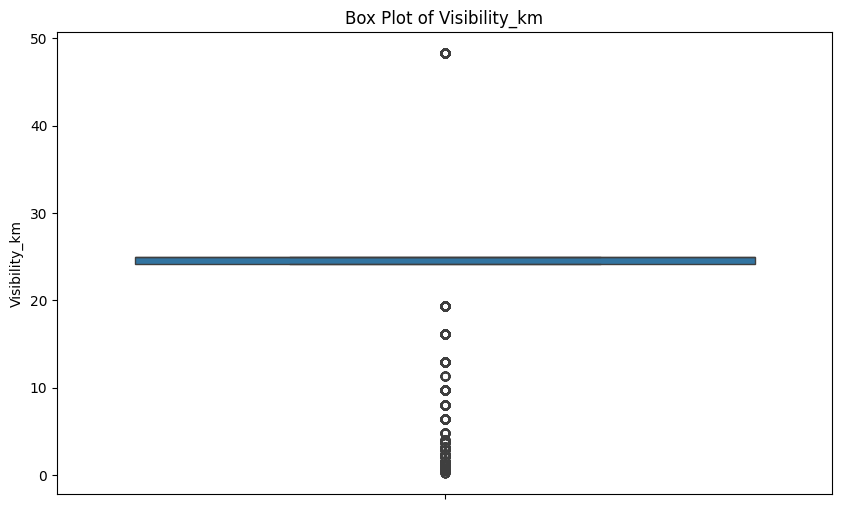

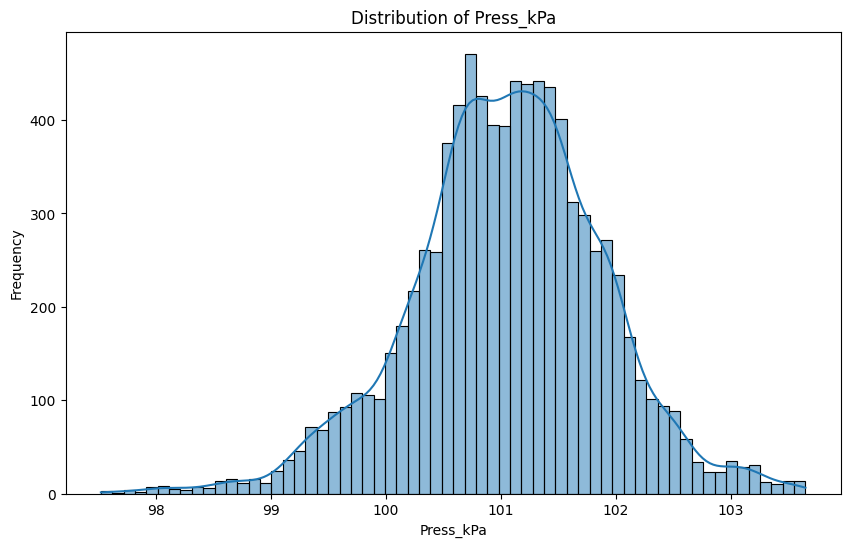

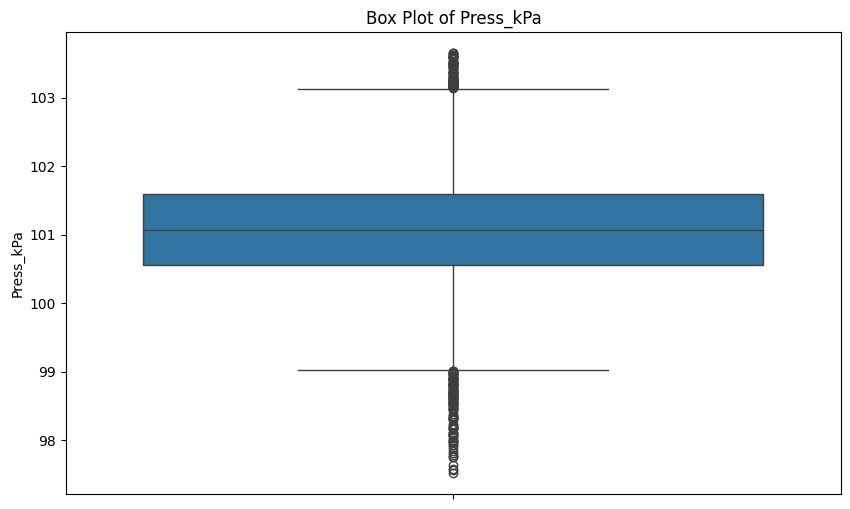

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    # Create histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [31]:
# Function to replace outliers with the median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

# Apply the function to each numerical column
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    data = replace_outliers_with_median(data, col)

print("Outliers have been replaced with the median in the numerical columns.")

Outliers have been replaced with the median in the numerical columns.


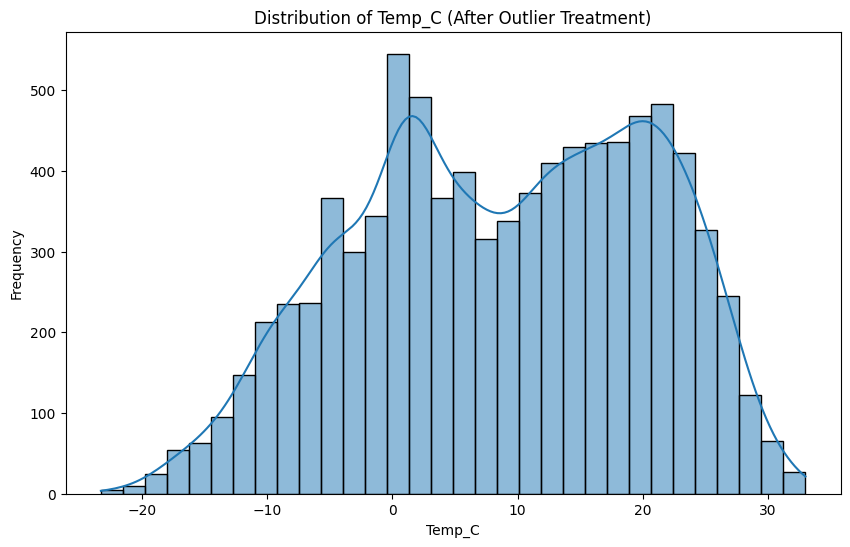

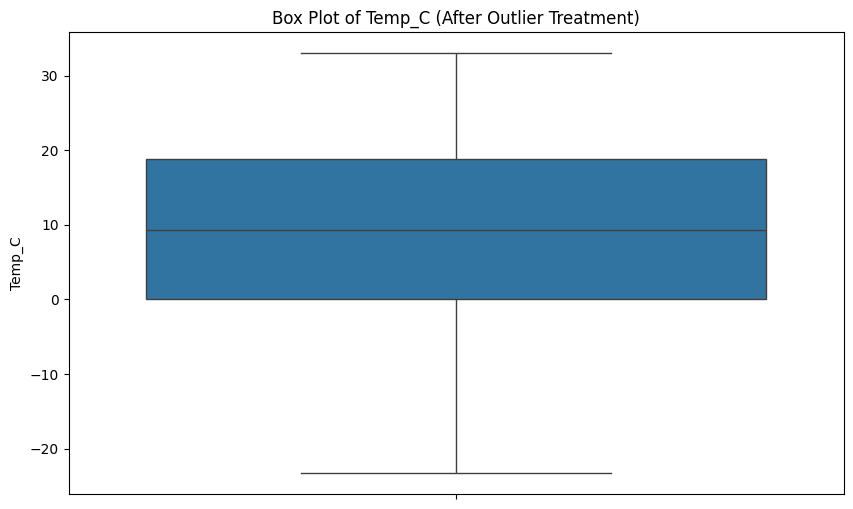

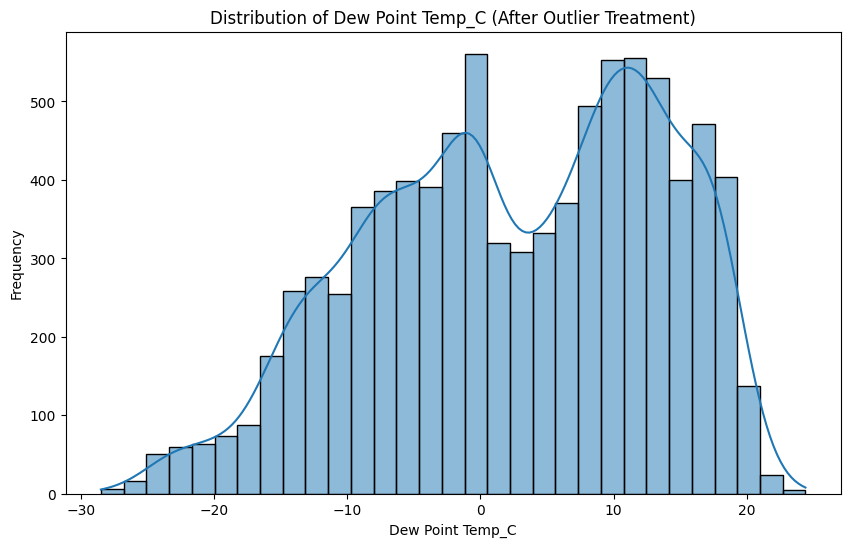

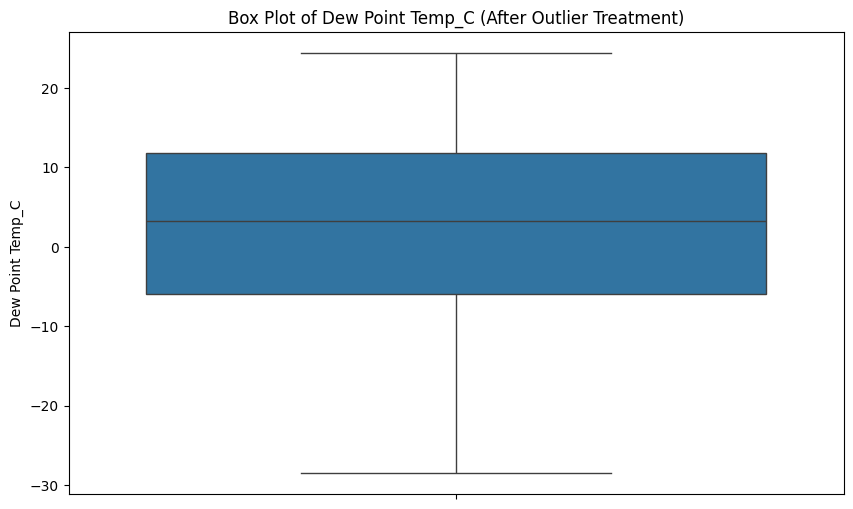

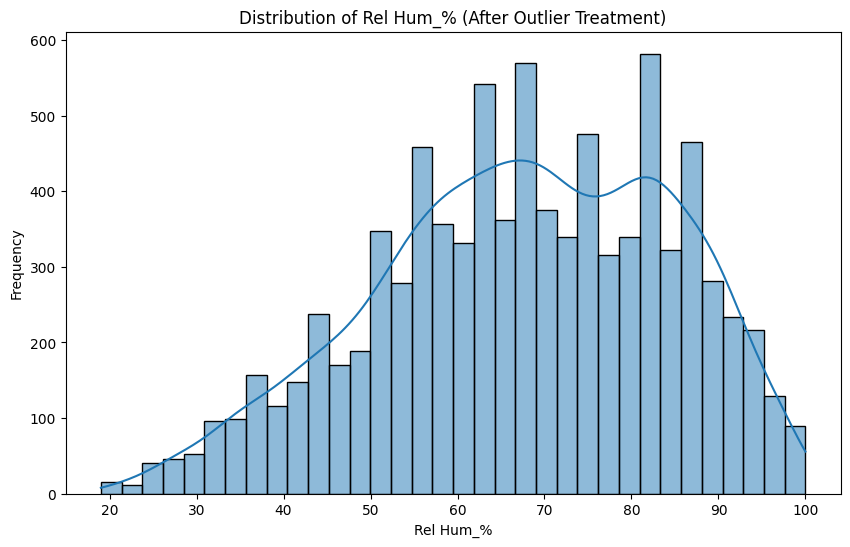

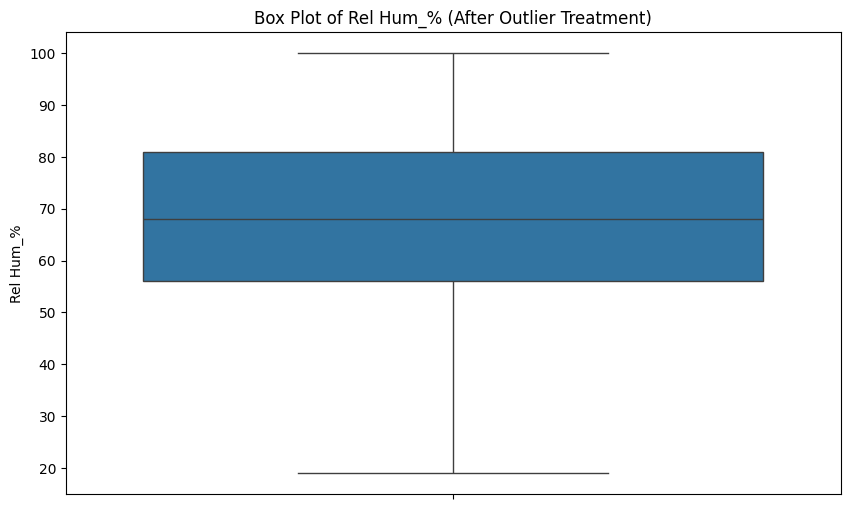

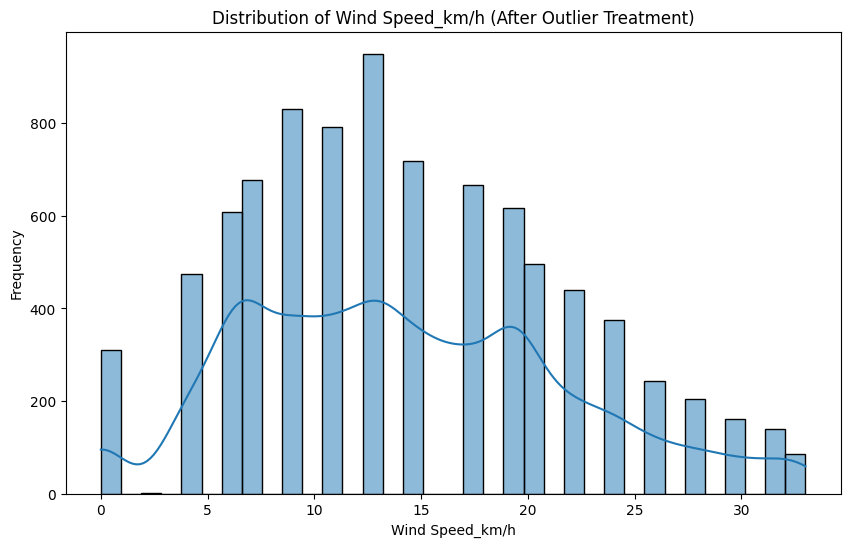

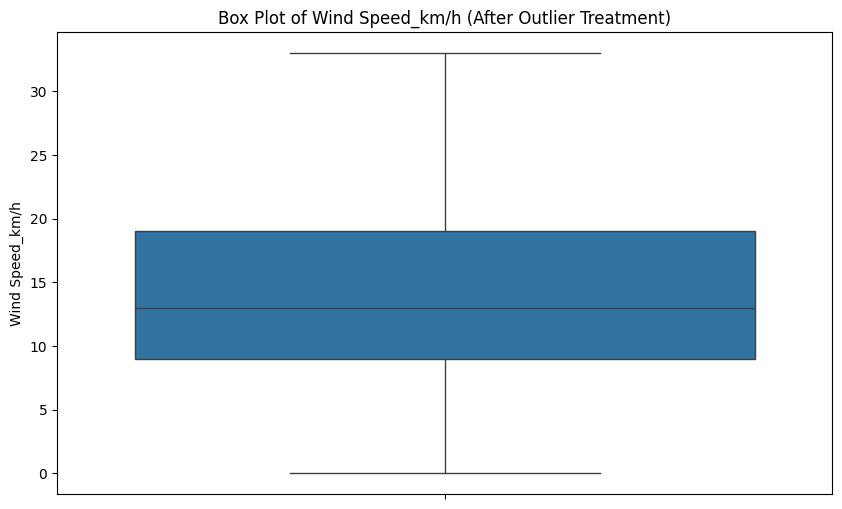

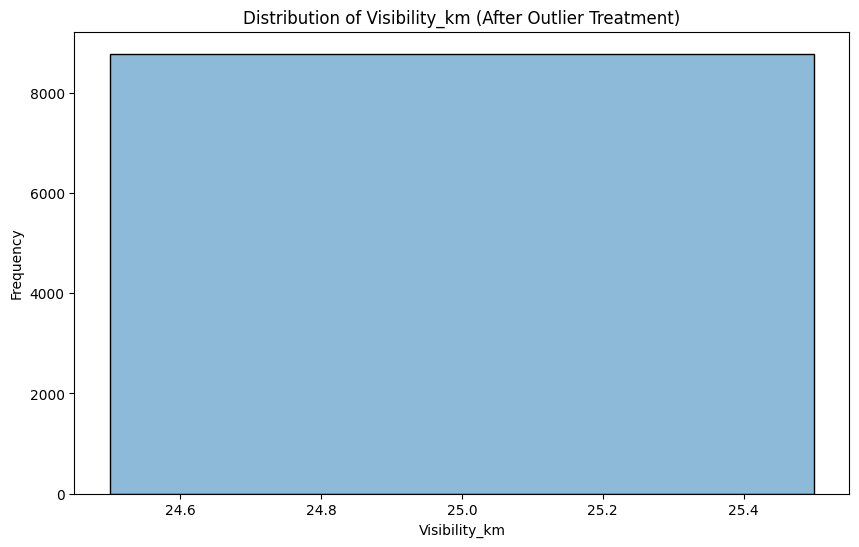

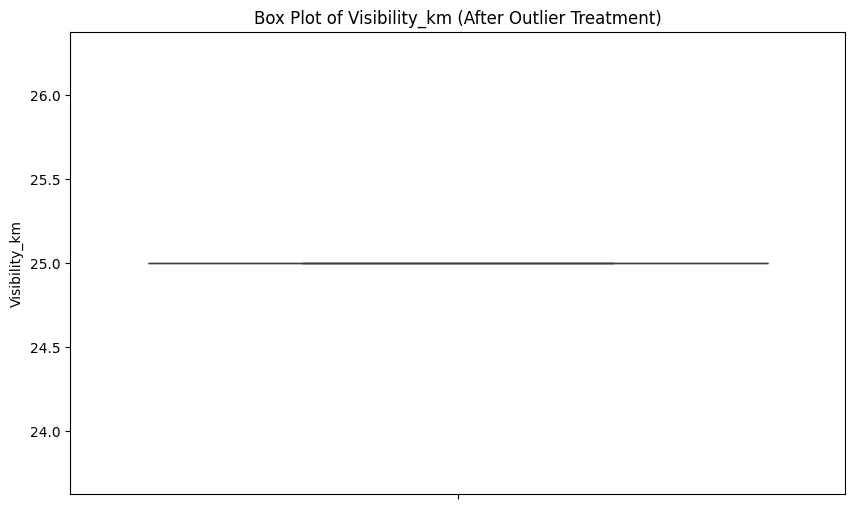

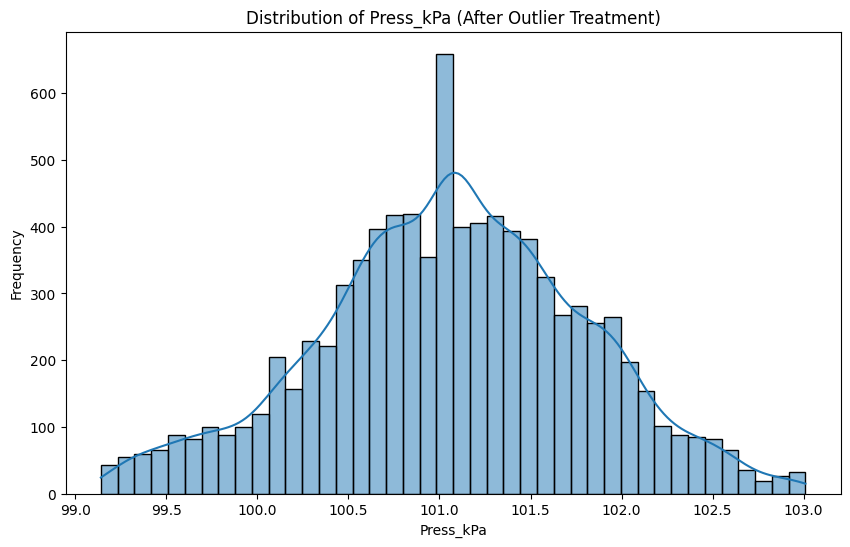

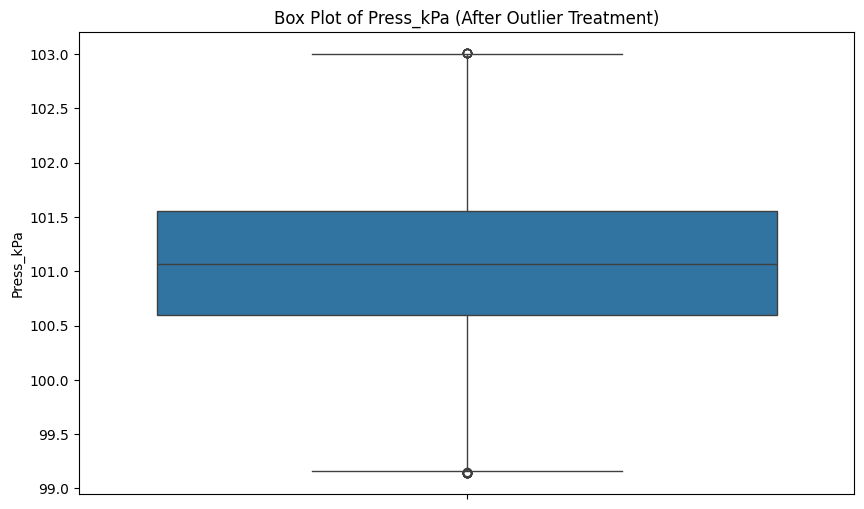

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    # Create histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col} (After Outlier Treatment)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col} (After Outlier Treatment)')
    plt.ylabel(col)
    plt.show()

**Reasoning**:
Generate visualization code to create histograms and box plots for the numerical columns to visualize their distributions and potential outliers after outlier treatment.